<a href="https://colab.research.google.com/github/ayciceksamet/knnfeature/blob/master/createcsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:

#Image Operations
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from google.colab import files
#Not so important
import pandas as pd

#image operation using skimage
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

import torch
from sklearn.externals import joblib

#classification using sklearn
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog
import tensorflow as tf
import pdb; 
#load the data
import glob

%cd drive/My Drive/

def etiketle(arr,n,name_of_directory):
    #Because there is not any label in datasets, so you must add the label manually
    label=[]

    for i in range(1, n):
        #This is the name of the folder, because this is nested file
        file_location = "ai1/dataset/"+name_of_directory+"/"+str(i)+".jpg"
        #read an image as array
        print(file_location)
        imgfile = cv2.imread(file_location, cv2.COLOR_BGR2GRAY)

        imgfile = rgb2gray(imgfile)
       
        res = cv2.resize(imgfile,(500, 500))
        
        img=np.asarray(res)
        
          #  pdb.set_trace();
           # print(img.shape)
        
            #Append to array
        arr.append(img)
       
            #Append the label
        label.append(name_of_directory)
    return arr,label

def preprocessing1(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        #img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        img=resize(arr[i], (500, 500),anti_aliasing=True)
        arr_prep.append(img)
    return arr_prep

def FtrExtractHOG(img):
    ftr,_=hog(img, orientations=32, pixels_per_cell=(128, 128),
            cells_per_block=(1, 1), visualize=True, multichannel=False)
    return ftr
  
def featureExtraction1(arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(FtrExtractHOG(arr[i]))
    return arr_feature

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#the list of data
normal=[]
covid=[]


covid,label_covid=etiketle(covid,24,"covid")
print("covid etiketleme bitti")

normal,label_normal=etiketle(normal,24,"normal")
print("normal etiketleme bitti")

X_Shapedes=np.concatenate((covid,normal))

y_Shapedes=np.concatenate((label_covid,label_normal))

X_train, X_test, y_train, y_test = train_test_split(X_Shapedes, y_Shapedes, test_size=0.4, random_state=42)



#dataset = {'xtrain': X_train, 'xtest': X_test,'ytrain': y_train,'ytest':y_test}

#hkl.dump(dataset,'/content/drive/My Drive/ai1/dataset.pkl')

#Preprocessing
X_trainp=preprocessing1(X_train)
X_testp=preprocessing1(X_test)
#Feature Extraction 
X_trainftr=featureExtraction1(X_trainp)
X_testftr=featureExtraction1(X_testp)









[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive
Found GPU at: /device:GPU:0
ai1/dataset/covid/1.jpg
ai1/dataset/covid/2.jpg
ai1/dataset/covid/3.jpg
ai1/dataset/covid/4.jpg
ai1/dataset/covid/5.jpg
ai1/dataset/covid/6.jpg
ai1/dataset/covid/7.jpg
ai1/dataset/covid/8.jpg
ai1/dataset/covid/9.jpg
ai1/dataset/covid/10.jpg
ai1/dataset/covid/11.jpg
ai1/dataset/covid/12.jpg
ai1/dataset/covid/13.jpg
ai1/dataset/covid/14.jpg
ai1/dataset/covid/15.jpg
ai1/dataset/covid/16.jpg
ai1/dataset/covid/17.jpg
ai1/dataset/covid/18.jpg
ai1/dataset/covid/19.jpg
ai1/dataset/covid/20.jpg
ai1/dataset/covid/21.jpg
ai1/dataset/covid/22.jpg
ai1/dataset/covid/23.jpg
covid etiketleme bitti
ai1/dataset/normal/1.jpg
ai1/dataset/normal/2.jpg
ai1/dataset/normal/3.jpg
ai1/dataset/normal/4.jpg
ai1/dataset/normal/5.jpg
ai1/dataset/normal/6.jpg
ai1/dataset/normal/7.jpg
ai1/dataset/normal/8.jpg
ai1/dataset/normal/9.jpg
ai1/dataset/normal/10.jpg
ai1/dataset/normal/11.jpg
ai1/dataset/normal/12.jpg
a

In [58]:
 #Image Operations
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from google.colab import files
#Not so important
import pandas as pd

#image operation using skimage
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

import torch
from sklearn.externals import joblib

#classification using sklearn
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog
import tensorflow as tf
import pdb; 
#load the data
import glob
import cv2
from matplotlib import pyplot as plt
import pickle as pkl


def preprocessing1(arr):
    
        img=cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
        img=resize(img, (256,341),anti_aliasing=True)

        return img

def FtrExtractHOG(img):
    ftr,_=hog(img, orientations=16, pixels_per_cell=(64, 64),
            cells_per_block=(1, 1), visualize=True, multichannel=False)
    return ftr
  

 
%cd drive/My Drive/
 
file_location = "ai1/muz/muz_5.jpg"


imgfile = cv2.imread(file_location, cv2.IMREAD_UNCHANGED)

res = cv2.resize(imgfile, dsize=(256,341),interpolation = cv2.INTER_AREA)

#Show the image with matplotlib
plt.imshow(imgfile)
plt.show()

        
img=np.asarray(res)


X_trainp=preprocessing1(img)

X_trainftr=FtrExtractHOG(X_trainp)




#Feature Extraction 


train = np.array(X_trainftr).reshape(160,3)

loaded_model = joblib.load('/content/drive/My Drive/ai1/model.pkl')

print(loaded_model.score)

y_knn_pred = loaded_model.predict()

print(y_knn_pred)




[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


error: ignored

In [0]:
!pip install -q hickle

     |████████████████████████████████| 51kB 2.3MB/s 


100.0 %


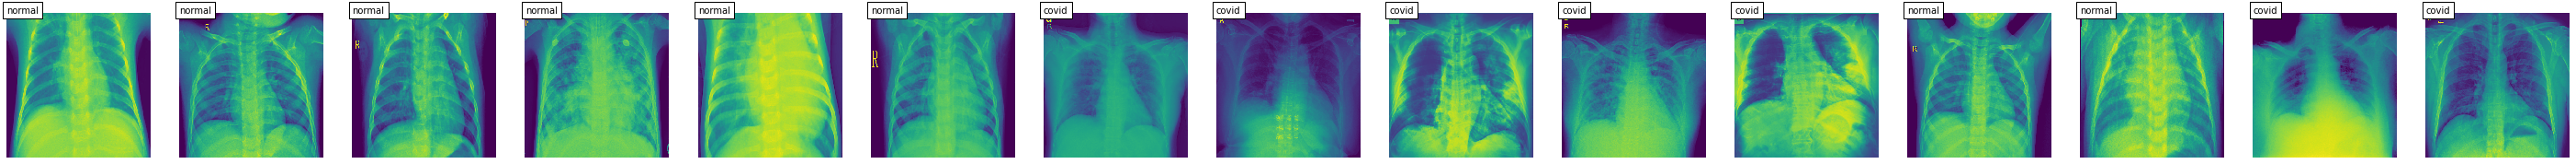

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV





knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=2, leaf_size=15)
knn2 = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=1)
knn_clf.fit(X_trainftr, y_train)

y_knn_pred = knn_clf.predict(X_testftr)


print(accuracy_score(y_test, y_knn_pred)*100,'%')

#List Hyperparameters to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,25))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Making model
#clf = GridSearchCV(knn2, hyperparameters, cv=10)
#best_model = clf.fit(X_trainftr,y_train)
#Best Hyperparameters Value
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
#y_pred = best_model.predict(X_testftr)
#Check performance using accuracy
#print(accuracy_score(y_test, y_pred))

slice = 15

plt.figure(figsize=(50,50))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test[i], interpolation='nearest')
    plt.text(0, 0, y_knn_pred[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='uniform', n_neighbors=1,leaf_size =16,p=1)

knn_clf.fit(X_trainftr, y_train)

y_knn_pred = knn_clf.predict(X_testftr)

print(accuracy_score(y_test, y_knn_pred)*100,'%')

loaded_model = pickle.load(open("/content/drive/My Drive/ai1/model.pkl", 'rb'))

slice = 15

plt.figure(figsize=(50,50))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test[i], interpolation='nearest')
    plt.text(0, 0, y_knn_pred[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

NameError: ignored

In [0]:
import torch
from sklearn.externals import joblib


joblib.dump(clf.best_estimator_, '/content/drive/My Drive/ai1/model.pkl')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


NameError: ignored